<a href="https://colab.research.google.com/github/darshselarka1497/TSLA-Stock-Price-Predictor/blob/master/predictor_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TSLA Price Prediction implemented using LSTM by utilizing its closing prices in 2020 so far...

In [189]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [233]:
df = web.DataReader('TSLA', data_source='yahoo', start='2010-06-29', end='2020-07-22')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900,16.110001
...,...,...,...,...,...,...
2020-07-16,1531.709961,1466.000000,1477.160034,1500.640015,14300800,1500.640015
2020-07-17,1537.510010,1490.000000,1513.449951,1500.839966,9330000,1500.839966
2020-07-20,1650.000000,1488.000000,1519.010010,1643.000000,17121400,1643.000000


In [234]:
df.shape

(2534, 6)

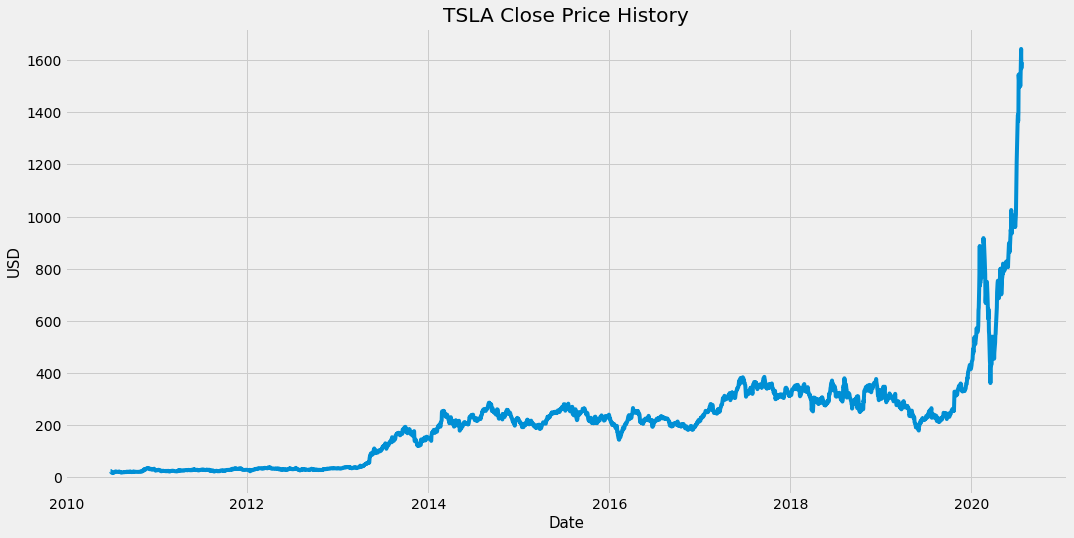

In [235]:
#visualizing closing price for TSLA in 2020 (so far...)
plt.figure(figsize=(16,8))
plt.title('TSLA Close Price History')
plt.plot(df['Close'])
plt.xlabel("Date", fontsize=15)
plt.ylabel('USD', fontsize=15)
plt.show()

In [236]:
close = df.filter(['Close'])
#converting close price dataframe to numpy arrays
dataset = close.values
training_data_size = math.ceil(len(dataset)*0.8)
training_data_size

2028

In [237]:
#data scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00497173],
       [0.00493486],
       [0.00378564],
       ...,
       [1.        ],
       [0.95412978],
       [0.96886059]])

In [239]:
train_data = scaled_data[0:training_data_size, :]
#splitting data
x_train = []
#target value
y_train = []
print(len(train_data))

for i in range (60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if(i<=60):
    print(x_train)
    print(y_train)

2028
[array([0.00497173, 0.00493486, 0.00378564, 0.00208948, 0.00019051,
       0.        , 0.00102016, 0.00098328, 0.00076819, 0.00143805,
       0.00248279, 0.00251352, 0.00297443, 0.00375492, 0.00276549,
       0.00271632, 0.00319567, 0.00337389, 0.00316495, 0.00291912,
       0.0030236 , 0.00279621, 0.00254425, 0.00314651, 0.0037795 ,
       0.00335546, 0.00285767, 0.00232915, 0.0023353 , 0.00198501,
       0.00129056, 0.00110619, 0.00154867, 0.00183137, 0.00205875,
       0.00182522, 0.00183751, 0.00202802, 0.00266101, 0.00208948,
       0.00251967, 0.00242748, 0.00239676, 0.00250123, 0.00226155,
       0.00285767, 0.00323255, 0.0032264 , 0.00291298, 0.00313422,
       0.00301745, 0.00268559, 0.0030236 , 0.00326942, 0.00379793,
       0.0031588 , 0.00272247, 0.00323255, 0.00305433, 0.00250123])]
[0.002310717352291207]


In [240]:
#converting x_train and y_train to numpy array to train LSTM neural network
x_train = np.array(x_train)
y_train = np.array(y_train)

In [241]:
#converting 2D data to 3D data for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1968, 60, 1)

In [243]:
#LSTM Model
model = Sequential()
#first layer
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#second layer
model.add(LSTM(50, return_sequences=False))
#third layer (dense layer)
model.add(Dense(25))
model.add(Dense(1))

In [244]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [245]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1968/1968 [==============================] - 85s 43ms/step - loss: 1.7260e-04


In [246]:
#testing data
test_data = scaled_data[(training_data_size-60): , :]
x_test = []
print(training_data_size,len(test_data))
#values for model to predict
y_test = dataset[training_data_size: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i , 0])

2028 566


In [247]:
#converting data to numpy data
x_test = np.array(x_test)
x_test.shape

(506, 60)

In [248]:
#converting 2D data to 3D data for LSTM model
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [249]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [250]:
#checking accuracy (rmse)
rmse = np.sqrt( np.mean(predictions-y_test)**2 )
rmse

12.471402797774363

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


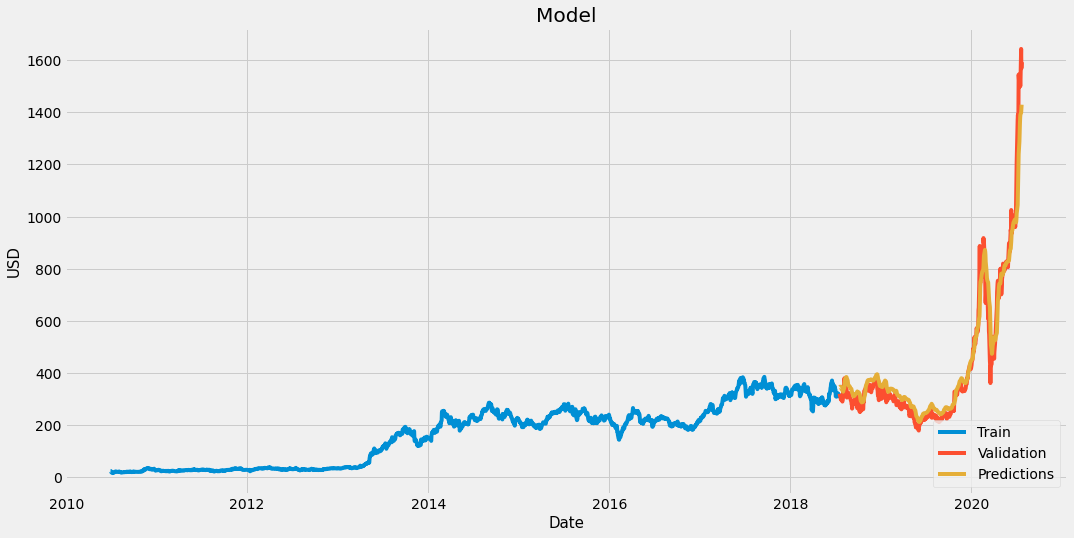

In [251]:
train = close[:training_data_size]
valid = close[training_data_size:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=15)
plt.ylabel('USD', fontsize=15)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [252]:
valid

,Close,Predictions
Date,,
2018-07-19,320.230011,346.261627
2018-07-20,313.579987,347.071472
2018-07-23,303.200012,346.883484
2018-07-24,297.429993,344.926697
2018-07-25,308.739990,341.579865
...,...,...
2020-07-16,1500.640015,1378.457031
2020-07-17,1500.839966,1391.683594
2020-07-20,1643.000000,1398.239014


In [254]:
tsla_quote = web.DataReader('TSLA', data_source='yahoo', start='2010-06-29', end='2020-07-22')
new_df = tsla_quote.filter(['Close'])
last_450_days = new_df[-60:].values
last_450_days_scaled=scaler.transform(last_450_days)
X = []
X.append(last_450_days_scaled)
X = np.array(X)
X = np.reshape(X,(X.shape[0],X.shape[1],1))
#Get prediction
pred_price = model.predict(X)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1439.3503]]


In [256]:
tsla_quote2 = web.DataReader('TSLA', data_source='yahoo', start='2020-07-22', end='2020-07-22')
print(tsla_quote2['Close'])

Date
2020-07-22    1592.329956
Name: Close, dtype: float64


In [265]:
print("Accuracy",(pred_price/1592.329956)*100,"%")

Accuracy [[90.39272]] %
